In [1]:
import matplotlib.pyplot as plt  # 그림으로 보기 위한 matplotlib 라이브러리 import
from tensorflow.keras.datasets import mnist  # 라이브러리가 기본으로 제공하는 mnist 데이터셋
from tensorflow.keras.utils import to_categorical  # one-hot encoding 을 위한 함수
from tensorflow.keras.models import Sequential  # 레이어를 층층히 쌓아가는 연쇄 모델
from tensorflow.keras.layers import Dense  # 완전연결층
from tensorflow.keras.models import load_model  # 저장된 모델 불러오기

11490434/11490434 [==============================] - 1s 0us/step
X_train_shape: (60000, 28, 28)
y_train_shape: (60000,)
X_test_shape: (10000, 28, 28)
y_test_shape: (10000,)


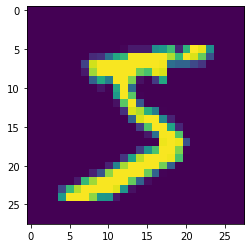

In [2]:
# 데이터 불러오기
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 데이터셋 차원 확인
print(f"X_train_shape: {X_train.shape}")  # X_train_shape: (60000, 28, 28)
print(f"y_train_shape: {y_train.shape}")  # y_train_shape: (60000,)
print(f"X_test_shape: {X_test.shape}")  # X_test_shape: (10000, 28, 28)
print(f"y_test_shape: {y_test.shape}")  # y_test_shape: (10000,)

plt.imshow(X_train[0])
plt.show()

In [3]:
# 데이터 전처리

input_shape = X_train.shape[1] * X_train.shape[2]  # 그림의 크기: 28 * 28
number_of_classes = len(set(y_train))  # 레이블의 종류. 0~9로 10개

# 모델은 단순한 정수를 처리하는것보다 0~1 사이의 실수를 처리할 때 더 좋은 성능을 보이므로,
# 0~255의 픽셀값으로 이루어진 이미지에 255를 나눠줘 전처리를 해준다.
X_train = X_train / 255.0
X_test = X_test / 255
X_train = X_train.reshape(-1, input_shape)  # 3차원 -> 2차원
X_test = X_test.reshape(-1, input_shape)

print(f"X_train_shape: {X_train.shape}")  # X_train_shape: (60000, 784)
print(f"X_test_shape: {X_test.shape}")  # X_test_shape: (10000, 784)

X_train_shape: (60000, 784)
X_test_shape: (10000, 784)


In [ ]:
# 출력 데이터는 단일 값, 즉 스칼라값으로 정해져있지만, 이를 1차원의 벡터값으로 바꿔준다.
# 이때, 이 벡터는 해당 클래스에 해당하는 값만 1로 두고, 나머지는 모두 0으로 채워준다. == 'one-hot-encoding'
# 예를 들면 5라는 클래스는 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]로 만들어주고, 1이라는 클래스는 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]로 바꿔준다.
y_train = to_categorical(y_train, number_of_classes)  # 원-핫 인코딩. 1차원 -> 2차원
y_test = to_categorical(y_test, number_of_classes)

print(f"y_train_shape: {y_train.shape}")  # y_train_shape: (60000, 10)
print(f"y_test_shape: {y_test.shape}")  # y_test_shape: (10000, 10)

In [ ]:
# 모델(데이터를 분석할 모델) 정의 및 컴파일
model = Sequential()